# Eulerian diagnostics computation

Tutorial to compute Eulerian diagnostics from a velocity field:

- Kinetic energy (KE)
- Okubo–Weiss parameter

The `Diagnostics.Eulerian` class contains functions to:

- loop over the different diagnostics (`diag`)
- compute kinetic energy (`KE`)
- compute the Okubo–Weiss parameter (`OW`)

---

### How to run

```python
out = Diagnostics.Eulerian(field, dayv).diag(
    diag=[''],
    UVunit,
    delta,
    lon,
    lat
)
```
    
### Inputs

- field : field object containing u and v
- dayv : date ('%Y-%m-%d') for the velocity field
- diag : list of diagnostics to be computed
- UVunit : velocity unit required to compute diagnostics (usually cm/s)
- delta : horizontal grid step for outputs
- lon, lat : limits of the domain [lonmin, lonmax] and [latmin, latmax]

Outputs:
- out = array containing all the diagnostics and associated variables
- out[0] = first diag: out[0]['lon'], out[0]['lat'],out[0]['var0']
- out[1] = second diag (if applies): out[1]['lon'], out[1]['lat'],out[1]['var1']
    

Import librairies

In [2]:
from lamta.Diagnostics import Eulerian
from lamta.Load_nc import loadCMEMSuv
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm_oc
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Load Field from netcdf

In [3]:
from pathlib import Path

from lamta_examples.data_fetch import ensure_dataset
from lamta.Load_nc import loadCMEMSuv
from lamta.Diagnostics import Eulerian

DATA_DIR = Path(
    ensure_dataset("altimetry_nrt_global_20220909-20220929.tar.gz")
)

rep = str(DATA_DIR / "altimetry" / "nrt_global") + "/"

all_days = ['20220928','20220929']
varn = {'longitude':'longitude','latitude':'latitude','u':'ugos','v':'vgos'}
field = loadCMEMSuv(all_days,rep,varn,unit='cm/s') # load u,v in cm/s
dayv = '2022-09-29'
delta0 = 0.01
loni = [-2,9]
lati = [35.5,44.5]

# compute Eulerian diagnostics
out = Eulerian(field,dayv).diag(diag=['KE','OW'],UVunit='cm/s',delta=delta0,
                                lon=loni,lat=lati)

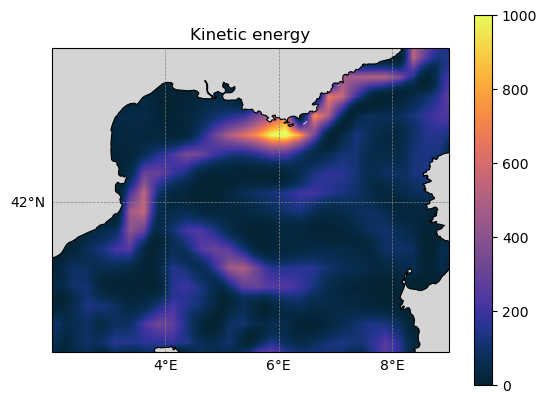

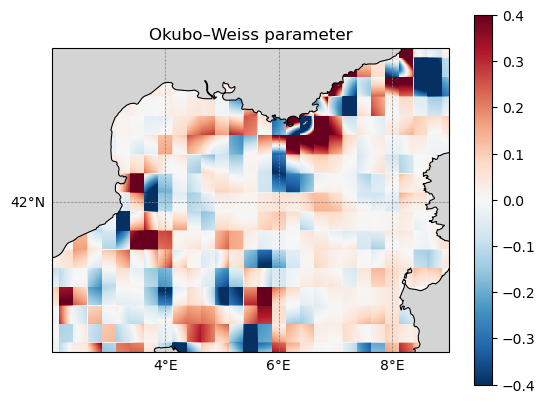

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator

# Eulerian outputs
KE = out[0]  # kinetic energy
OW = out[1]  # okubo-weiss

# Domain (same as your Basemap call)
lon_min, lon_max = 2, 9
lat_min, lat_max = 40, 44

# -------------------------
# Kinetic Energy (Cartopy)
# -------------------------
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Background like fillcontinents + coastlines
ax.add_feature(cfeature.LAND, facecolor="0.83", edgecolor="none", zorder=2)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=3)

pcm = ax.pcolormesh(
    KE["lon"], KE["lat"], KE["KE"],
    transform=ccrs.PlateCarree(),
    cmap=cm_oc.cm.thermal,
    vmin=0, vmax=1000,
    zorder=1,
    shading="auto",
)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    color="0.5",
)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = MultipleLocator(2)
gl.ylocator = MultipleLocator(2)

plt.colorbar(pcm, ax=ax)
ax.set_title("Kinetic energy")
plt.show()

# -------------------------
# Okubo–Weiss (Cartopy)
# -------------------------
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="0.83", edgecolor="none", zorder=2)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=3)

pcm = ax.pcolormesh(
    OW["lon"], OW["lat"], OW["ow"],
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-0.4, vmax=0.4,
    zorder=1,
    shading="auto",
)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    color="0.5",
)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = MultipleLocator(2)
gl.ylocator = MultipleLocator(2)

plt.colorbar(pcm, ax=ax)
ax.set_title("Okubo–Weiss parameter")
plt.show()
